**Name : Abdul Basit**

**Reg_No : GCS2309**

**Quantum Computing [Quiz-2]**

# **Q1**: Teleportation

In [ ]:
# !pip install -q qiskit
# !pip install -q qiskit-aer
# !pip install -q pylatexenc
# !pip install -q qiskit-ibmq-provider

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import Aer, execute, BasicAer
import numpy as np
from numpy import sqrt

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


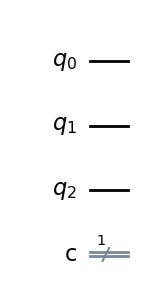

In [ ]:
# Creating the Teleportation Circuit
TPC = QuantumCircuit(3,1)
TPC.draw('mpl')

`**Defining a plus state**`

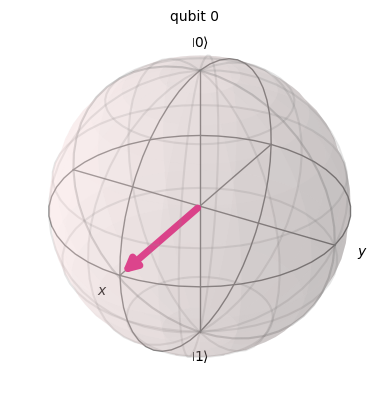

In [ ]:
ket_zero = np.array([1,0])
ket_one = np.array([0,1])
ket_plus = 1/sqrt(2)*(ket_zero + ket_one)
plot_bloch_multivector(ket_plus)

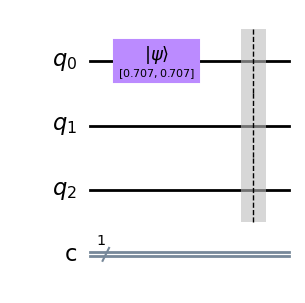

In [ ]:
TPC.initialize(ket_plus,0)
TPC.barrier() ## Putting barrier
TPC.draw('mpl')

In [ ]:
# Creating a Function the draw the circuit whenever needed
def DC():
  return TPC.draw('mpl')

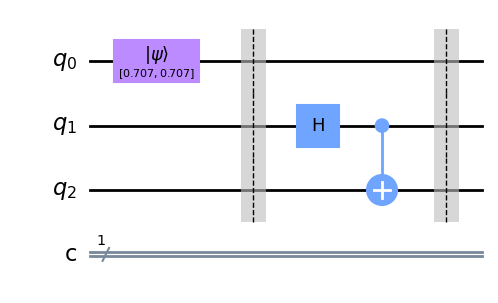

In [ ]:
TPC.h(1)
TPC.cx(1,2)
TPC.barrier()
DC()

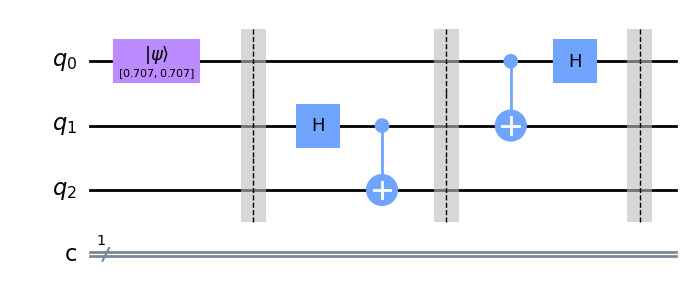

In [ ]:
TPC.cx(0,1)
TPC.h(0)
TPC.barrier()
DC()

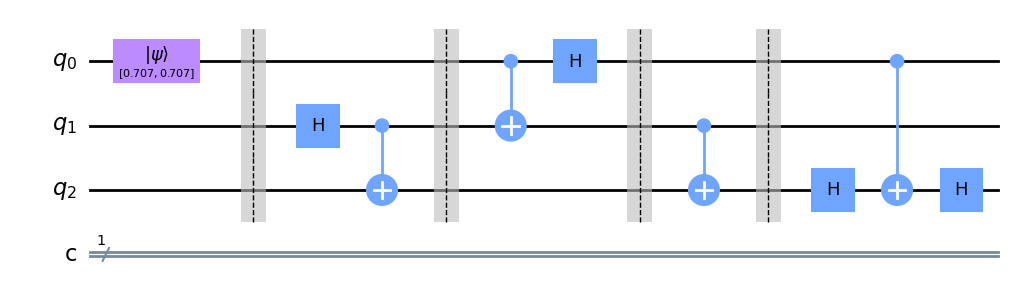

In [ ]:
TPC.cx(1,2)
TPC.barrier()
TPC.h(2)
TPC.cx(0,2)
TPC.h(2)
DC()

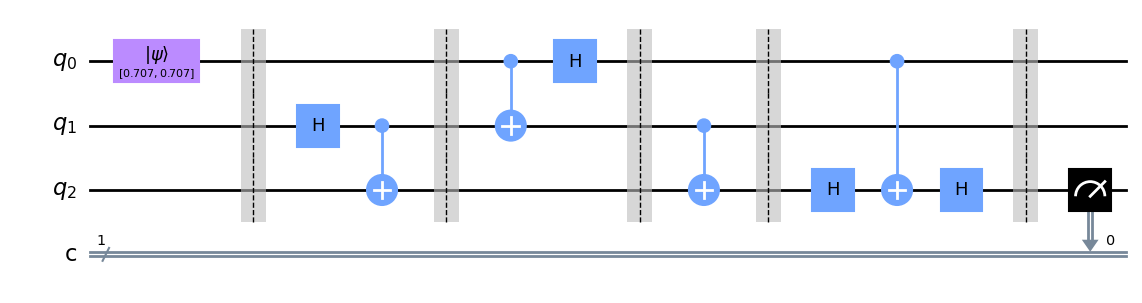

In [ ]:
## Adding measurement
TPC.barrier()
TPC.measure(2,0)
DC()

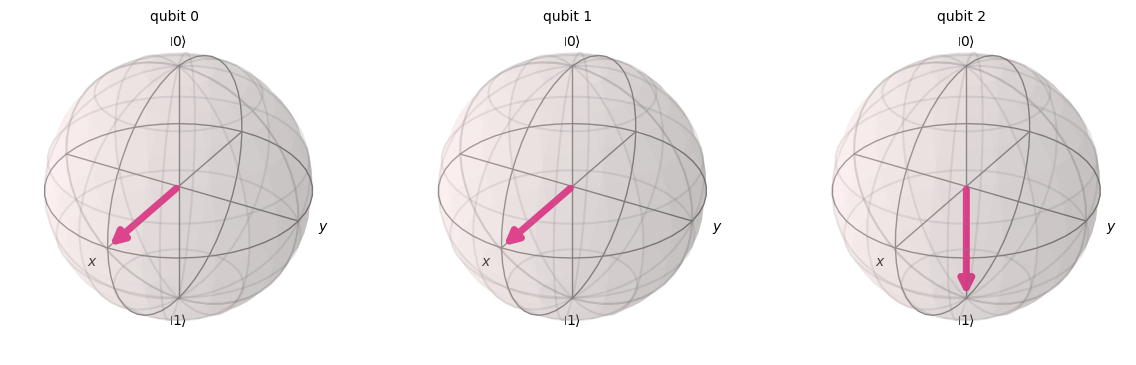

In [ ]:
backend = Aer.get_backend('statevector_simulator')
backend_results_state = execute(TPC,backend).result().get_statevector()
plot_bloch_multivector(backend_results_state)

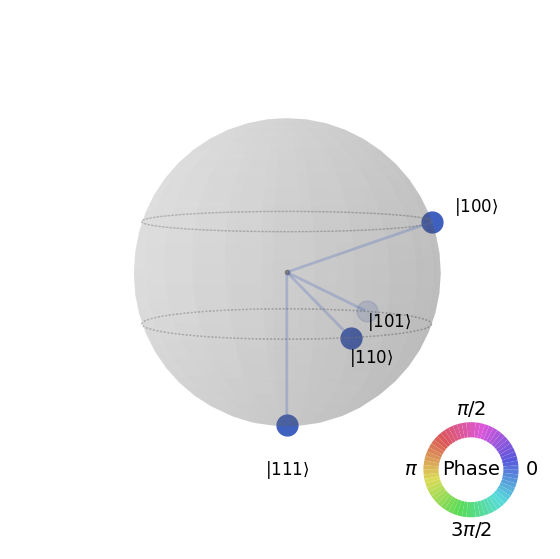

In [ ]:
plot_state_qsphere(backend_results_state)

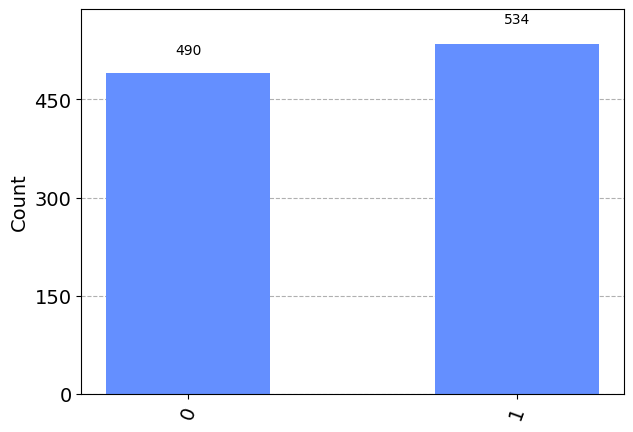

In [ ]:
backend2 = Aer.get_backend('qasm_simulator')
backend_results_count = execute(TPC,backend,shots=1024).result().get_counts()
plot_histogram(backend_results_count)

# Q2 : Quantum Coin Game

In [ ]:
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute

In [ ]:
# Function to Draw Circuit
def DC(circuit):
  circuit.barrier()
  return circuit.draw('mpl')

In [ ]:
## Function to give Quantum Computer its Turn
def QuntumComp_Turn(QC):
  QC.h(0)
  return DC(QC)

In [ ]:
## Function to give Human his Turn
def HumanTurn(QC):
  options=[('Identity', 'i'), ('Bit Flip', 'x')]
  print("select an option\n", options[0],'\n',options[1])
  opt = input("1 or 2 :")
  if opt == '1':
    QC.i(0)
  elif opt == '2':
    QC.x(0)
  else:
    print("Select correct input")
  return DC(QC)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


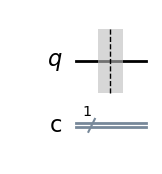

In [ ]:
## Creating a Circuit
QC = QuantumCircuit(1,1) # 1 for circuit type and 1 for measurement
DC(QC)

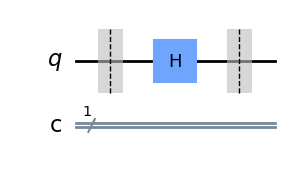

In [ ]:
## 1st Qunatum Computers Turn
QuntumComp_Turn(QC)

select an option
 ('Identity', 'i') 
 ('Bit Flip', 'x')
1 or 2 :1


<ipython-input-18-d04532b94657>:7: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  QC.i(0)


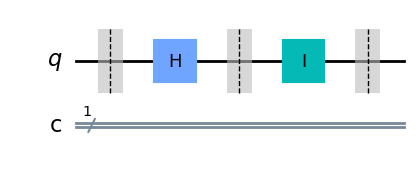

In [ ]:
## 2nd Human's Turn
HumanTurn(QC)

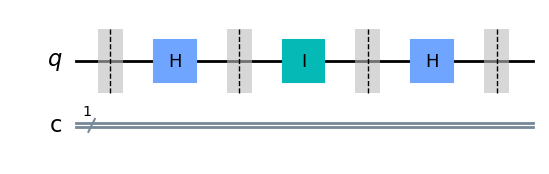

In [ ]:
## 3rd Qunatum Computers Turn
QuntumComp_Turn(QC)

### Measuring the Results

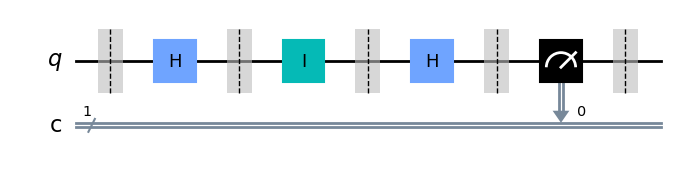

In [ ]:
QC.measure(0,0)
DC(QC)

## Checking the Results on Simulator and Qunatum Computer

{'0': 7000}


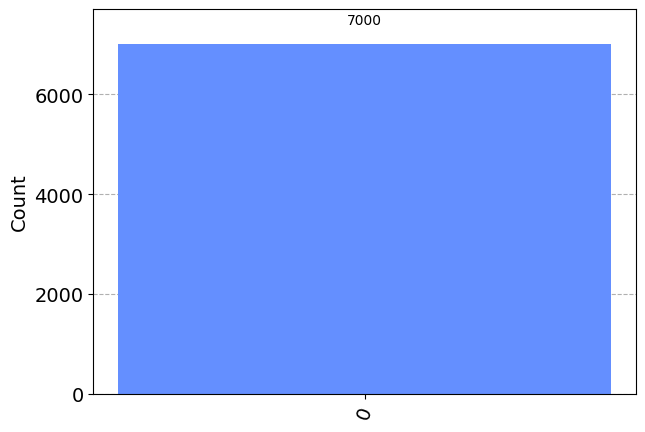

In [ ]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('aer_simulator')
job = execute(QC, backend, shots=7000)
res = job.result().get_counts()
print(res)
plot_histogram(res)

In [ ]:
## Defining a Function to Check winner from the result
def checkwins(keys,length):
  if keys[0] == '0' and length == 1:
    print('Qunatum Computer wins the game')
  elif keys[1] == '1'and length == 1:
    print('Human Wins wins the game')
  else:
    print("It is Tie Match.")

In [ ]:
## Checking the Results
## As  |0> is for the Qunatum Computer
## and |1> is for the Human so
keys = list(res.keys())
length = len(keys)
checkwins(keys,length)

Qunatum Computer wins the game


## Running on Real Quantum Computer

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('e770c96c2144fc8bd127a731f2790fbffb2745c7f4a67cb55a1f9ba5f89cf962694a11e8fc1978036b41308042190e5d702945b2ad5db6bf29f637799a2a87c0')
provider = IBMQ.load_account()


def RunOnRealQC(QC):
  backend_real = provider.get_backend('simulator_stabilizer')
  job_real = execute(QC, backend_real, shots=500)
  res_real = job_real.result().get_counts()
  print(res_real)
  return plot_histogram(res_real)

<ipython-input-34-a190b0a3960b>:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('e770c96c2144fc8bd127a731f2790fbffb2745c7f4a67cb55a1f9ba5f89cf962694a11e8fc1978036b41308042190e5d702945b2ad5db6bf29f637799a2a87c0')
<ipython-input-34-a190b0a3960b>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('e770c96c2144fc8bd127a731f2790fbffb2745c7

{'0': 500}


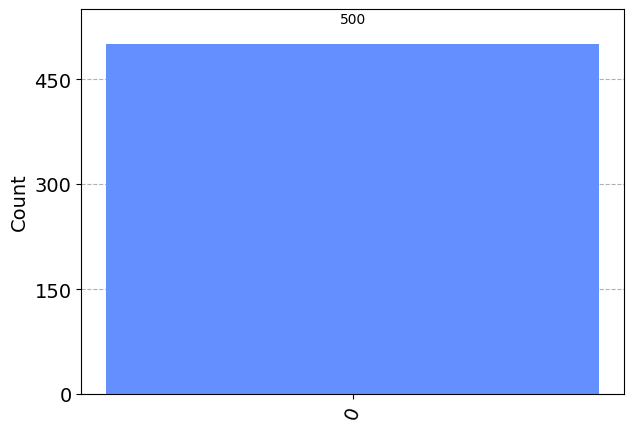

In [ ]:
RunOnRealQC(QC)

## Q2: Part 1

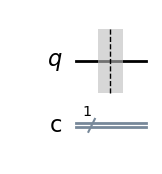

In [ ]:
QC2 = QuantumCircuit(1,1) # 1 for circuit type and 1 for measurement
DC(QC2)

select an option
 ('Identity', 'i') 
 ('Bit Flip', 'x')
1 or 2 :1


<ipython-input-18-d04532b94657>:7: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  QC.i(0)


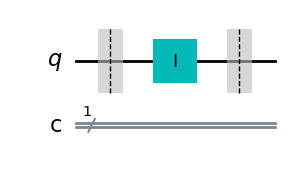

In [ ]:
## 1st Human's Turn
HumanTurn(QC2)

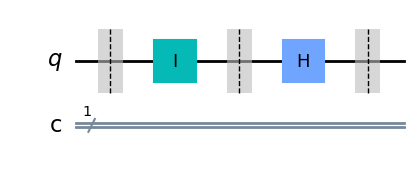

In [ ]:
## 2nd Qunatum Computers Turn
QuntumComp_Turn(QC2)

select an option
 ('Identity', 'i') 
 ('Bit Flip', 'x')
1 or 2 :2


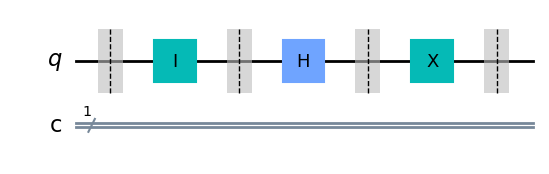

In [ ]:
## 3rd Human's Turn
HumanTurn(QC2)

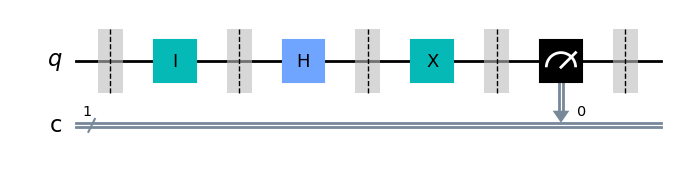

In [ ]:
QC2.measure(0,0)
DC(QC2)

{'0': 3544, '1': 3456}


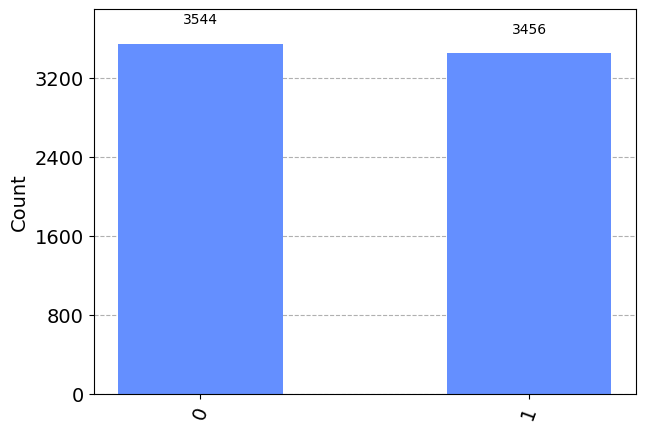

In [ ]:
backend2 = Aer.get_backend('aer_simulator')
job2 = execute(QC2, backend2, shots=7000)
res2 = job2.result().get_counts()
print(res2)
plot_histogram(res2)

{'1': 267, '0': 233}


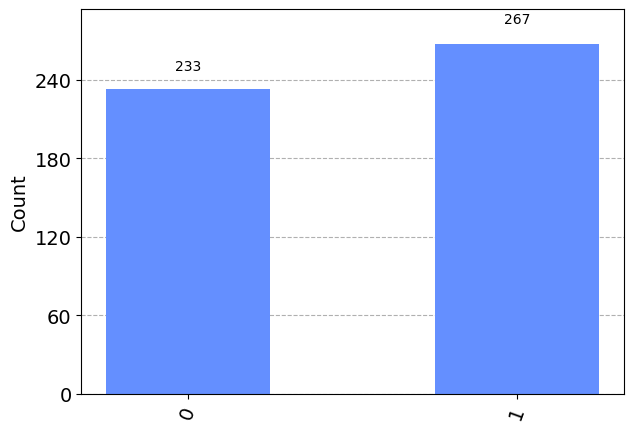

In [ ]:
RunOnRealQC(QC2)

In [ ]:
keys2 = list(res2.keys())
length2 = len(keys2)
checkwins(keys2,length2)

It is Tie Match.


## Q2: Part 2

In [ ]:
## Defining a New Function where changing the values
## as per question's requirements
## What if, instead of representing head as |0⟩, the tail is represented as |0⟩ ?
def checkwinsP2(keys,length):
  if keys[0] == '0' and length == 1:
    print('Human Wins wins the game')
  elif keys[1] == '1'and length == 1:
    print('Qunatum Computer wins the game')
  else:
    print("It is Tie Match.")

In [ ]:
## Now checking the results from the Previous Circuit by above Function
checkwinsP2(keys,length)

Human Wins wins the game


####**Now Human will win All the time**

## Q2: Part 3

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


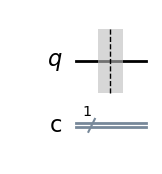

In [ ]:
QC3 = QuantumCircuit(1,1) # 1 for circuit type and 1 for measurement
DC(QC3)

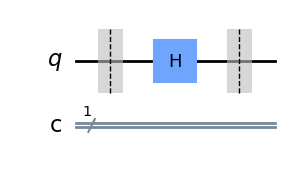

In [ ]:
## 1st Qunatum Computers Turn
QuntumComp_Turn(QC3)

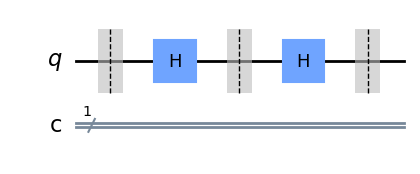

In [ ]:
## 2nd Qunatum Computers Turn
QuntumComp_Turn(QC3)

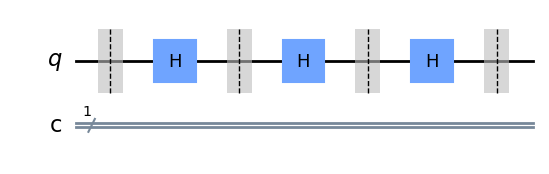

In [ ]:
## 3rd Qunatum Computers Turn
QuntumComp_Turn(QC3)

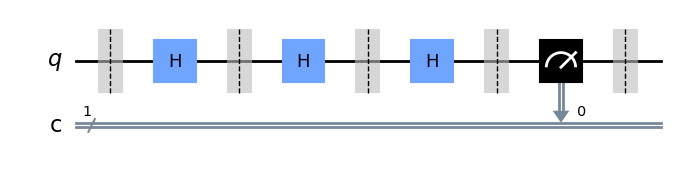

In [ ]:
QC3.measure(0,0)
DC(QC3)

{'0': 3384, '1': 3616}


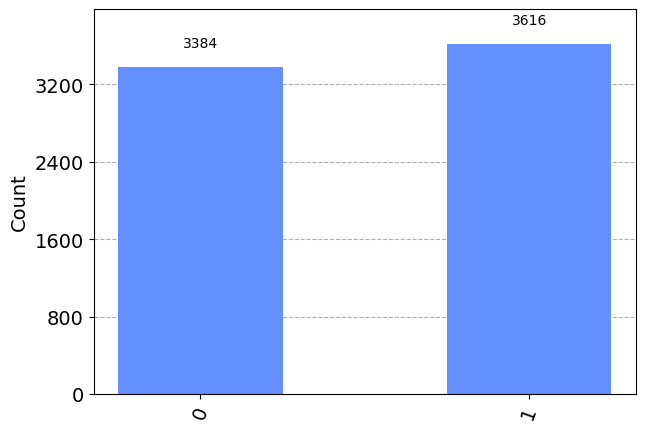

In [ ]:
# Measuring the Result
backend3 = Aer.get_backend('aer_simulator')
job3 = execute(QC3, backend3, shots=7000)
res3 = job3.result().get_counts()
print(res3)
plot_histogram(res3)

In [ ]:
keys3 = list(res3.keys())
length3 = len(keys3)
checkwins(keys3,length3)

It is Tie Match.


{'1': 243, '0': 257}


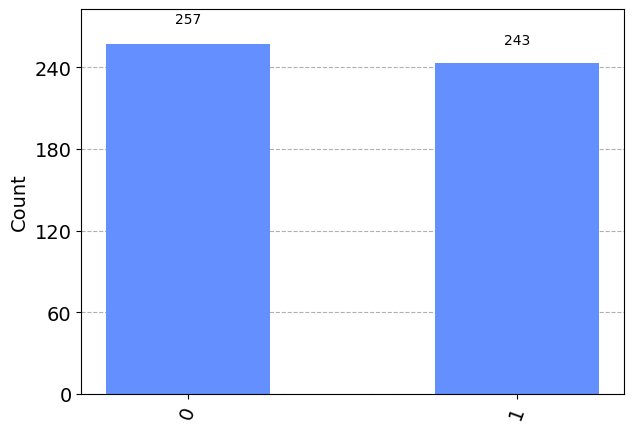

In [ ]:
RunOnRealQC(QC3)

#### **If Two Quantum Computer plays together it will be Always a Tie game between both Computers.**